# Credit Card - Exploratory Data Analysis 

# Read Dataset

In [56]:
from warnings import filterwarnings
filterwarnings('ignore')

In [57]:
import pymongo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

client = pymongo.MongoClient("mongodb+srv://neerajprasad209:<Username><Password>.p3s6l5t.mongodb.net/?retryWrites=true&w=majority")


In [58]:
db_name = client["ML_project"]
coll_name = db_name["CreditCard_Fault"]

In [59]:
data = coll_name.find()
data

In [60]:
data_list = coll_name.find()
df = pd.DataFrame(data_list)
df.head()

,_id,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,660d4057a99d230c0d638dbd,1,20000.0,2,2,1,24,2,2,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,660d4057a99d230c0d638dbe,2,120000.0,2,2,2,26,-1,2,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,660d4057a99d230c0d638dbf,3,90000.0,2,2,2,34,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,660d4057a99d230c0d638dc0,4,50000.0,2,2,1,37,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,660d4057a99d230c0d638dc1,5,50000.0,1,2,1,57,-1,0,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Dataset Info

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         30000 non-null  object 
 1   ID                          30000 non-null  int64  
 2   LIMIT_BAL                   30000 non-null  float64
 3   SEX                         30000 non-null  int64  
 4   EDUCATION                   30000 non-null  int64  
 5   MARRIAGE                    30000 non-null  int64  
 6   AGE                         30000 non-null  int64  
 7   PAY_0                       30000 non-null  int64  
 8   PAY_2                       30000 non-null  int64  
 9   PAY_3                       30000 non-null  int64  
 10  PAY_4                       30000 non-null  int64  
 11  PAY_5                       30000 non-null  int64  
 12  PAY_6                       30000 non-null  int64  
 13  BILL_AMT1                   300

# Checking Missing Data

In [62]:
df.isna().sum()

_id                           0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Converting Sex, Education and Marriage columns to Object

In [63]:
df['SEX']=df['SEX'].astype(str)
df['EDUCATION']=df['EDUCATION'].astype(str)
df['MARRIAGE']=df['MARRIAGE'].astype(str)
#df['default.payment.next.month']=df['default.payment.next.month'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         30000 non-null  object 
 1   ID                          30000 non-null  int64  
 2   LIMIT_BAL                   30000 non-null  float64
 3   SEX                         30000 non-null  object 
 4   EDUCATION                   30000 non-null  object 
 5   MARRIAGE                    30000 non-null  object 
 6   AGE                         30000 non-null  int64  
 7   PAY_0                       30000 non-null  int64  
 8   PAY_2                       30000 non-null  int64  
 9   PAY_3                       30000 non-null  int64  
 10  PAY_4                       30000 non-null  int64  
 11  PAY_5                       30000 non-null  int64  
 12  PAY_6                       30000 non-null  int64  
 13  BILL_AMT1                   300

# Drop Statistically insignificant column - ID 

In [64]:
df1 = df.drop(labels=['_id','ID'],axis=1)
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Statistical Summarry for each column

In [65]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


# Checking for Categorical Data

In [66]:
df1.describe(include = 'object').T

,count,unique,top,freq
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964


# Correlation

In [67]:
df1.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


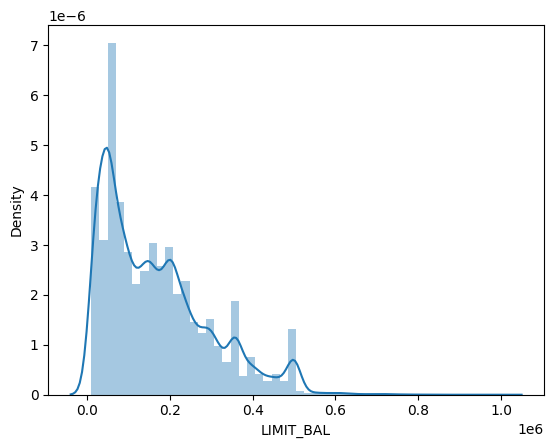

In [68]:
sns.distplot(df1['LIMIT_BAL'])
plt.show()

In [69]:
# Renaming Default Column Name
df1.rename(columns={'default.payment.next.month':'default'}, inplace=True)

# Categorical and Continuous variables seperation

In [70]:
cat = df1.select_dtypes(exclude='number').columns
con = df1.select_dtypes(include = 'number').columns


In [71]:
cat

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [72]:
con

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

# Univariate Analysis

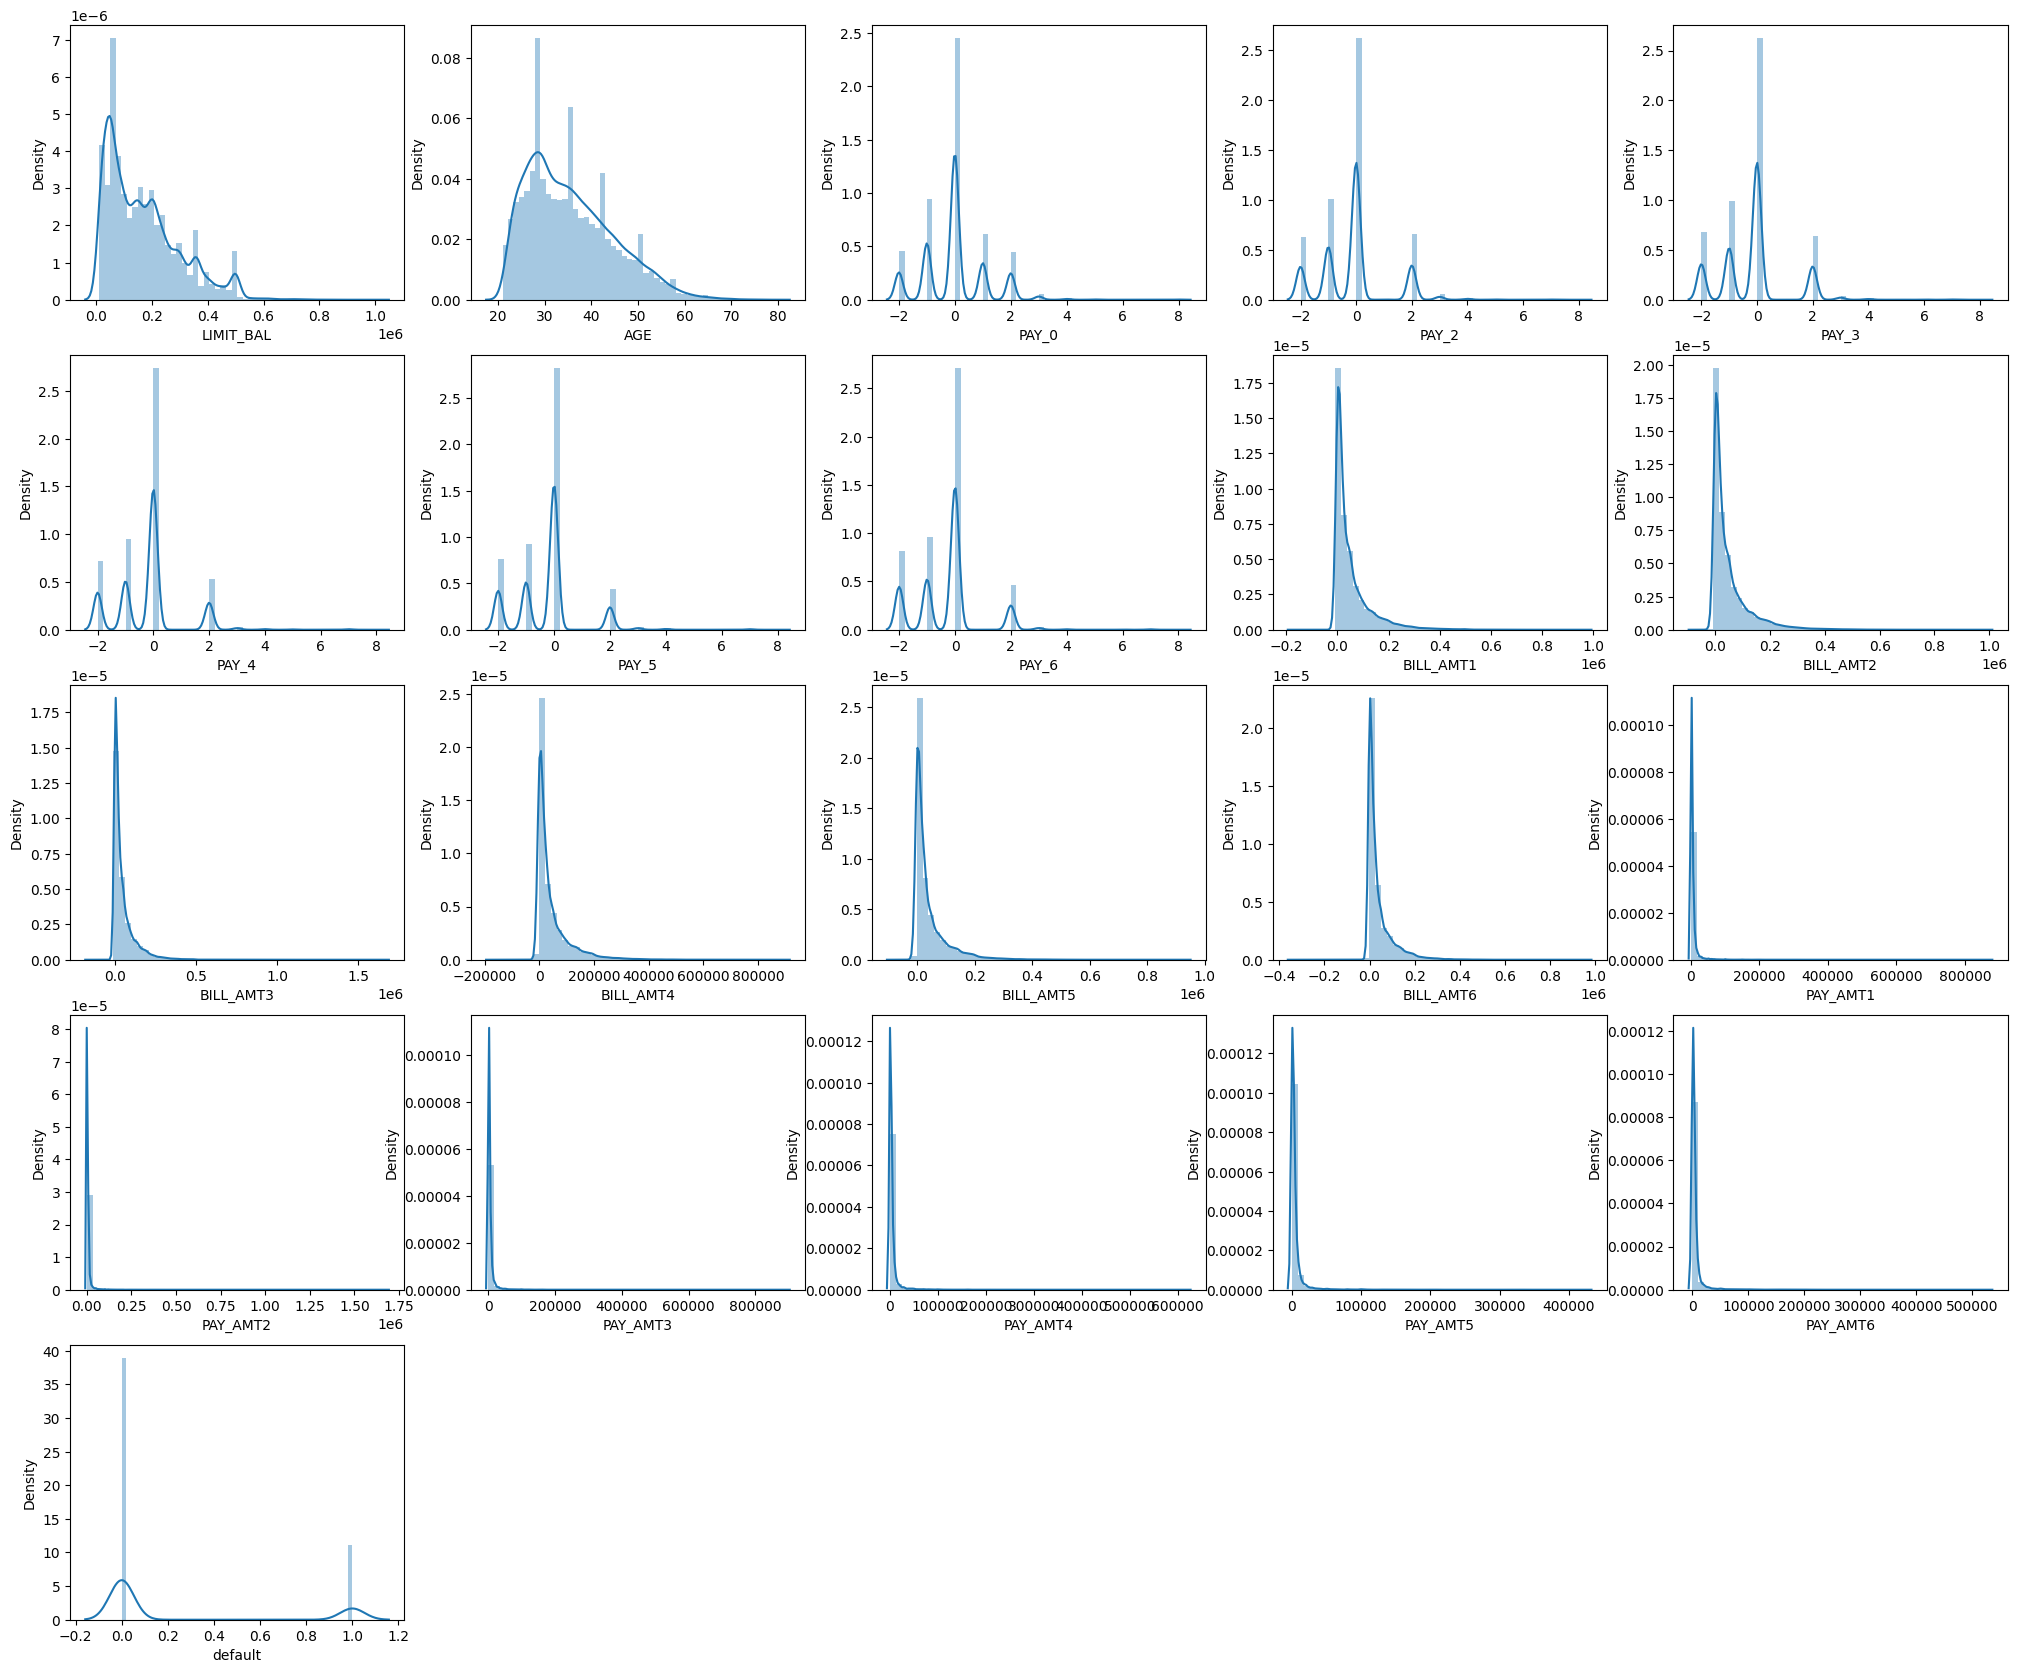

In [75]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(25,25))
x=1
for i in con:
    plt.subplot(6,5,x)
    x=x+1
    sb.distplot(df1[i])

# BoxPlots with Target Variable

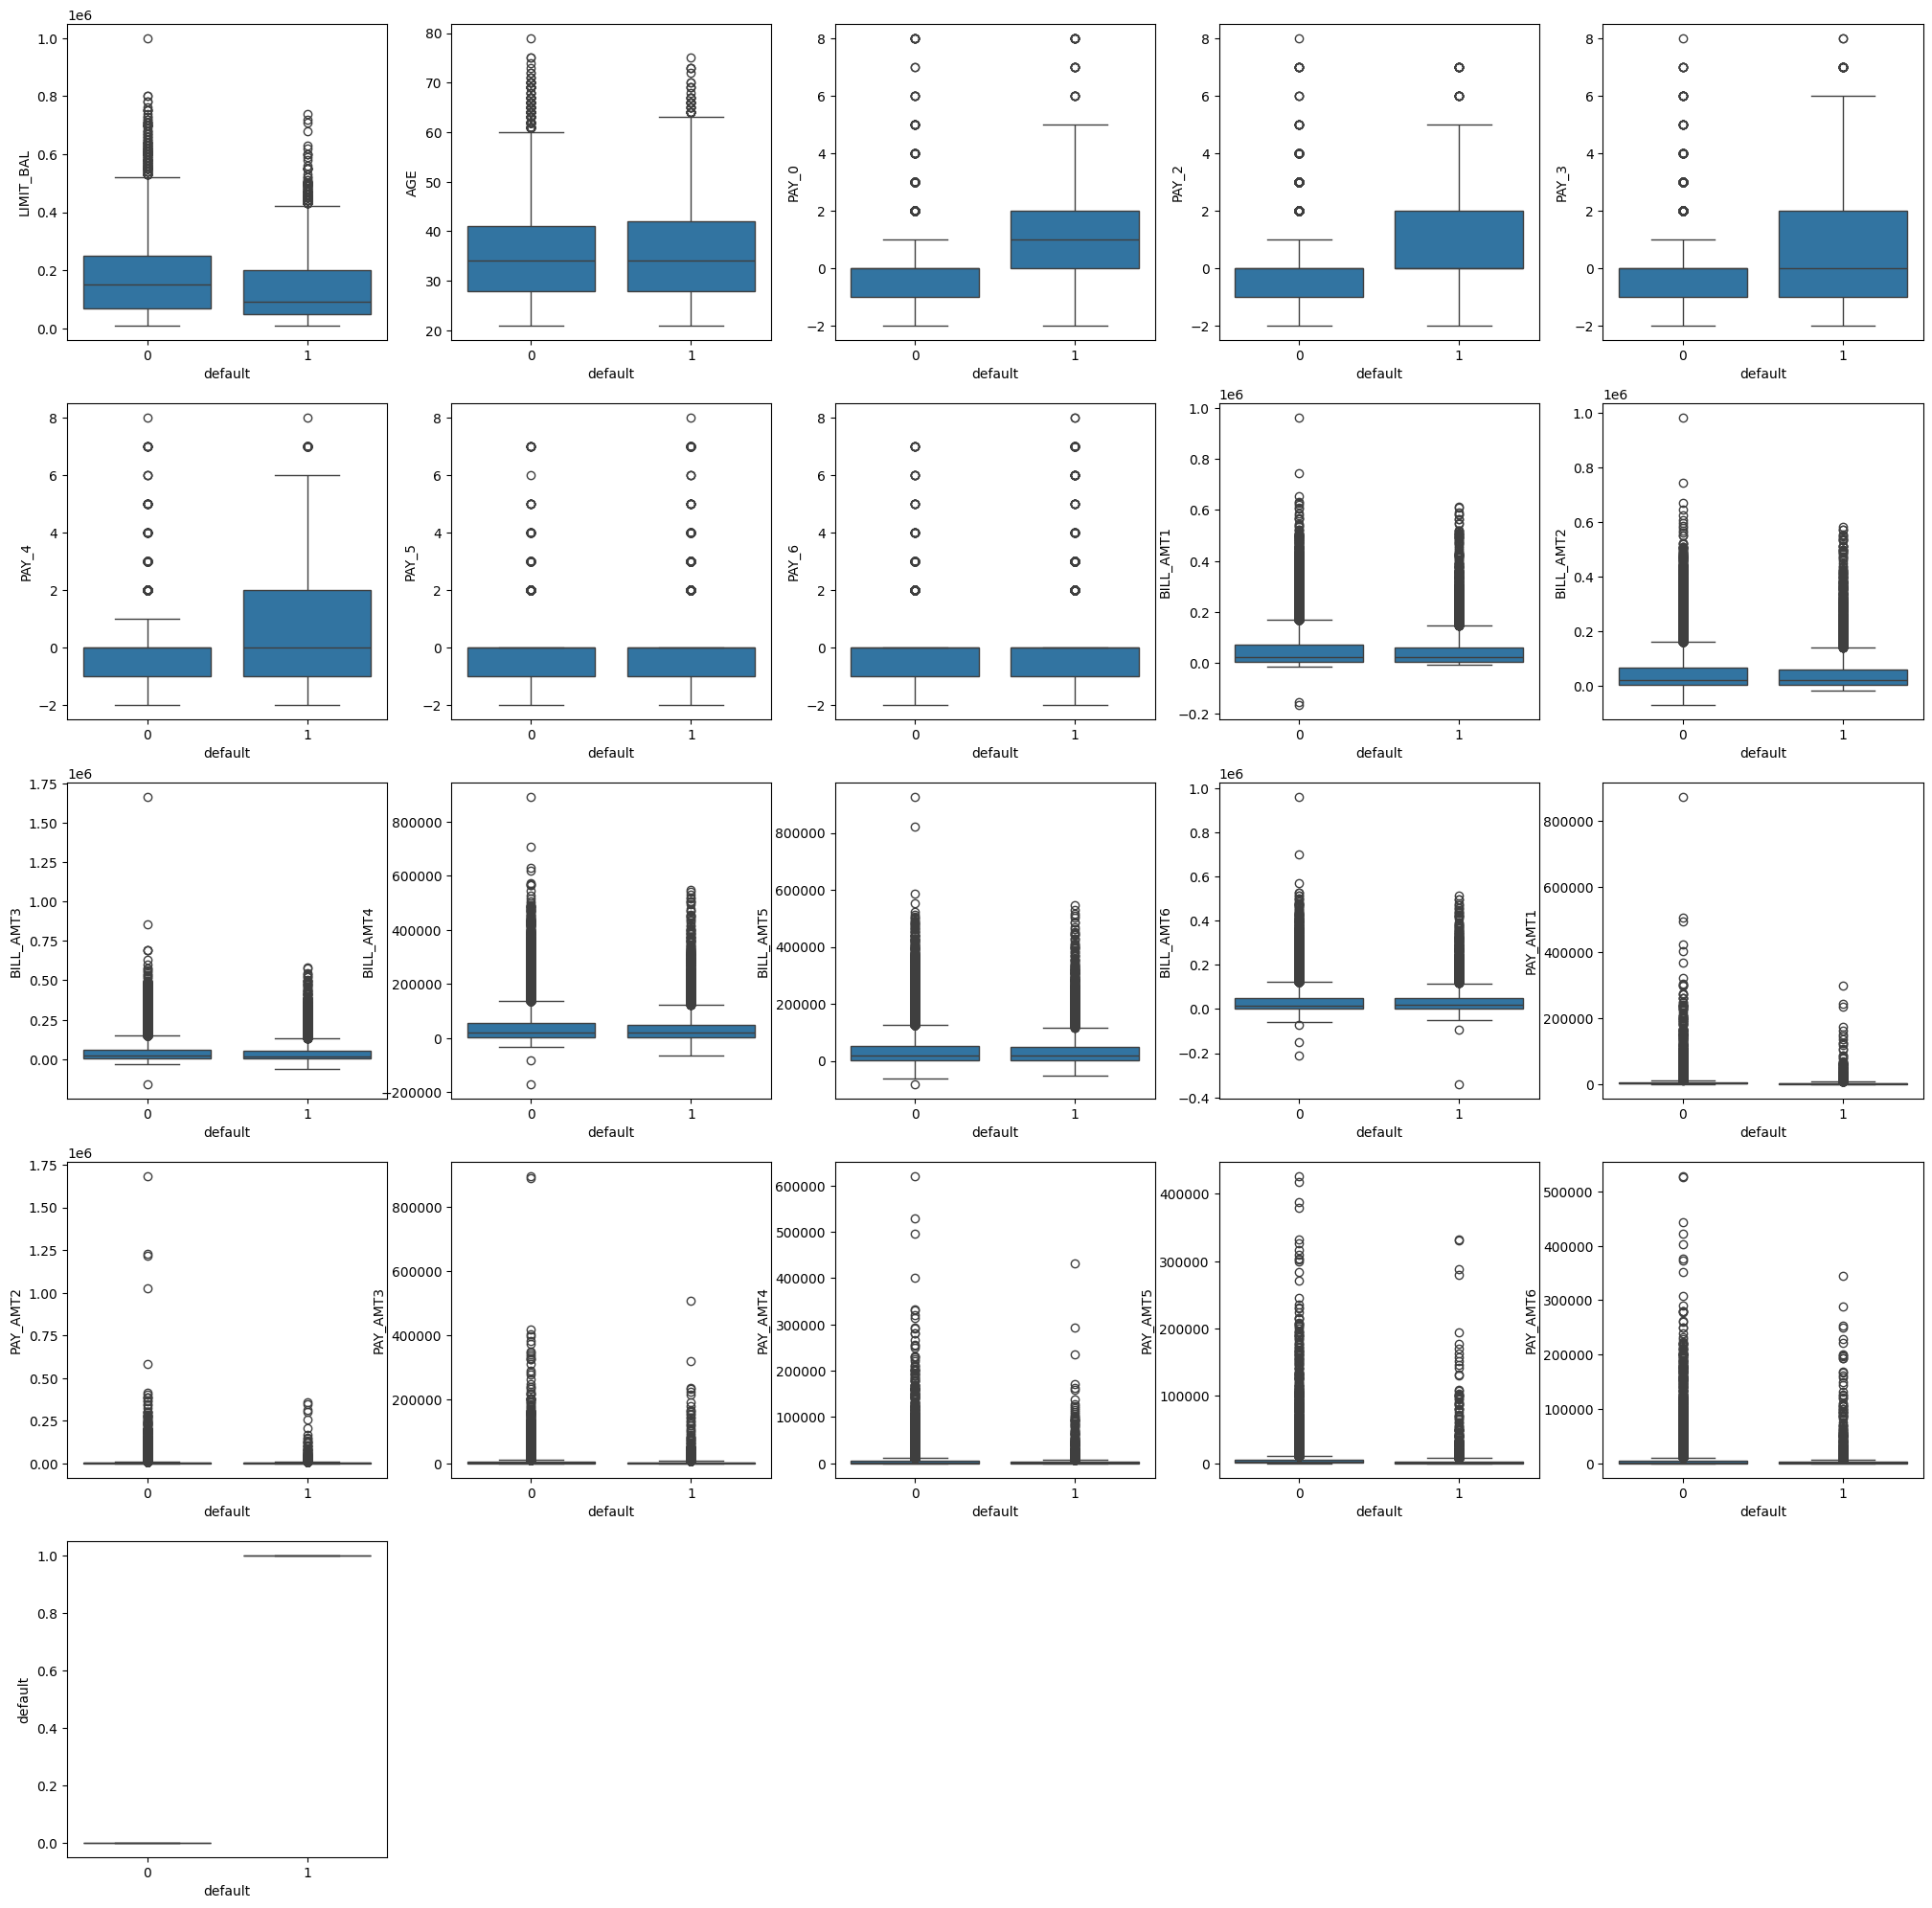

In [82]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(25,30))
x=1
for i in con:
    plt.subplot(6,5,x)
    x=x+1
    sb.boxplot(data=df1,x='default',y=i)

# Relationship of continuous variables with Male/Female

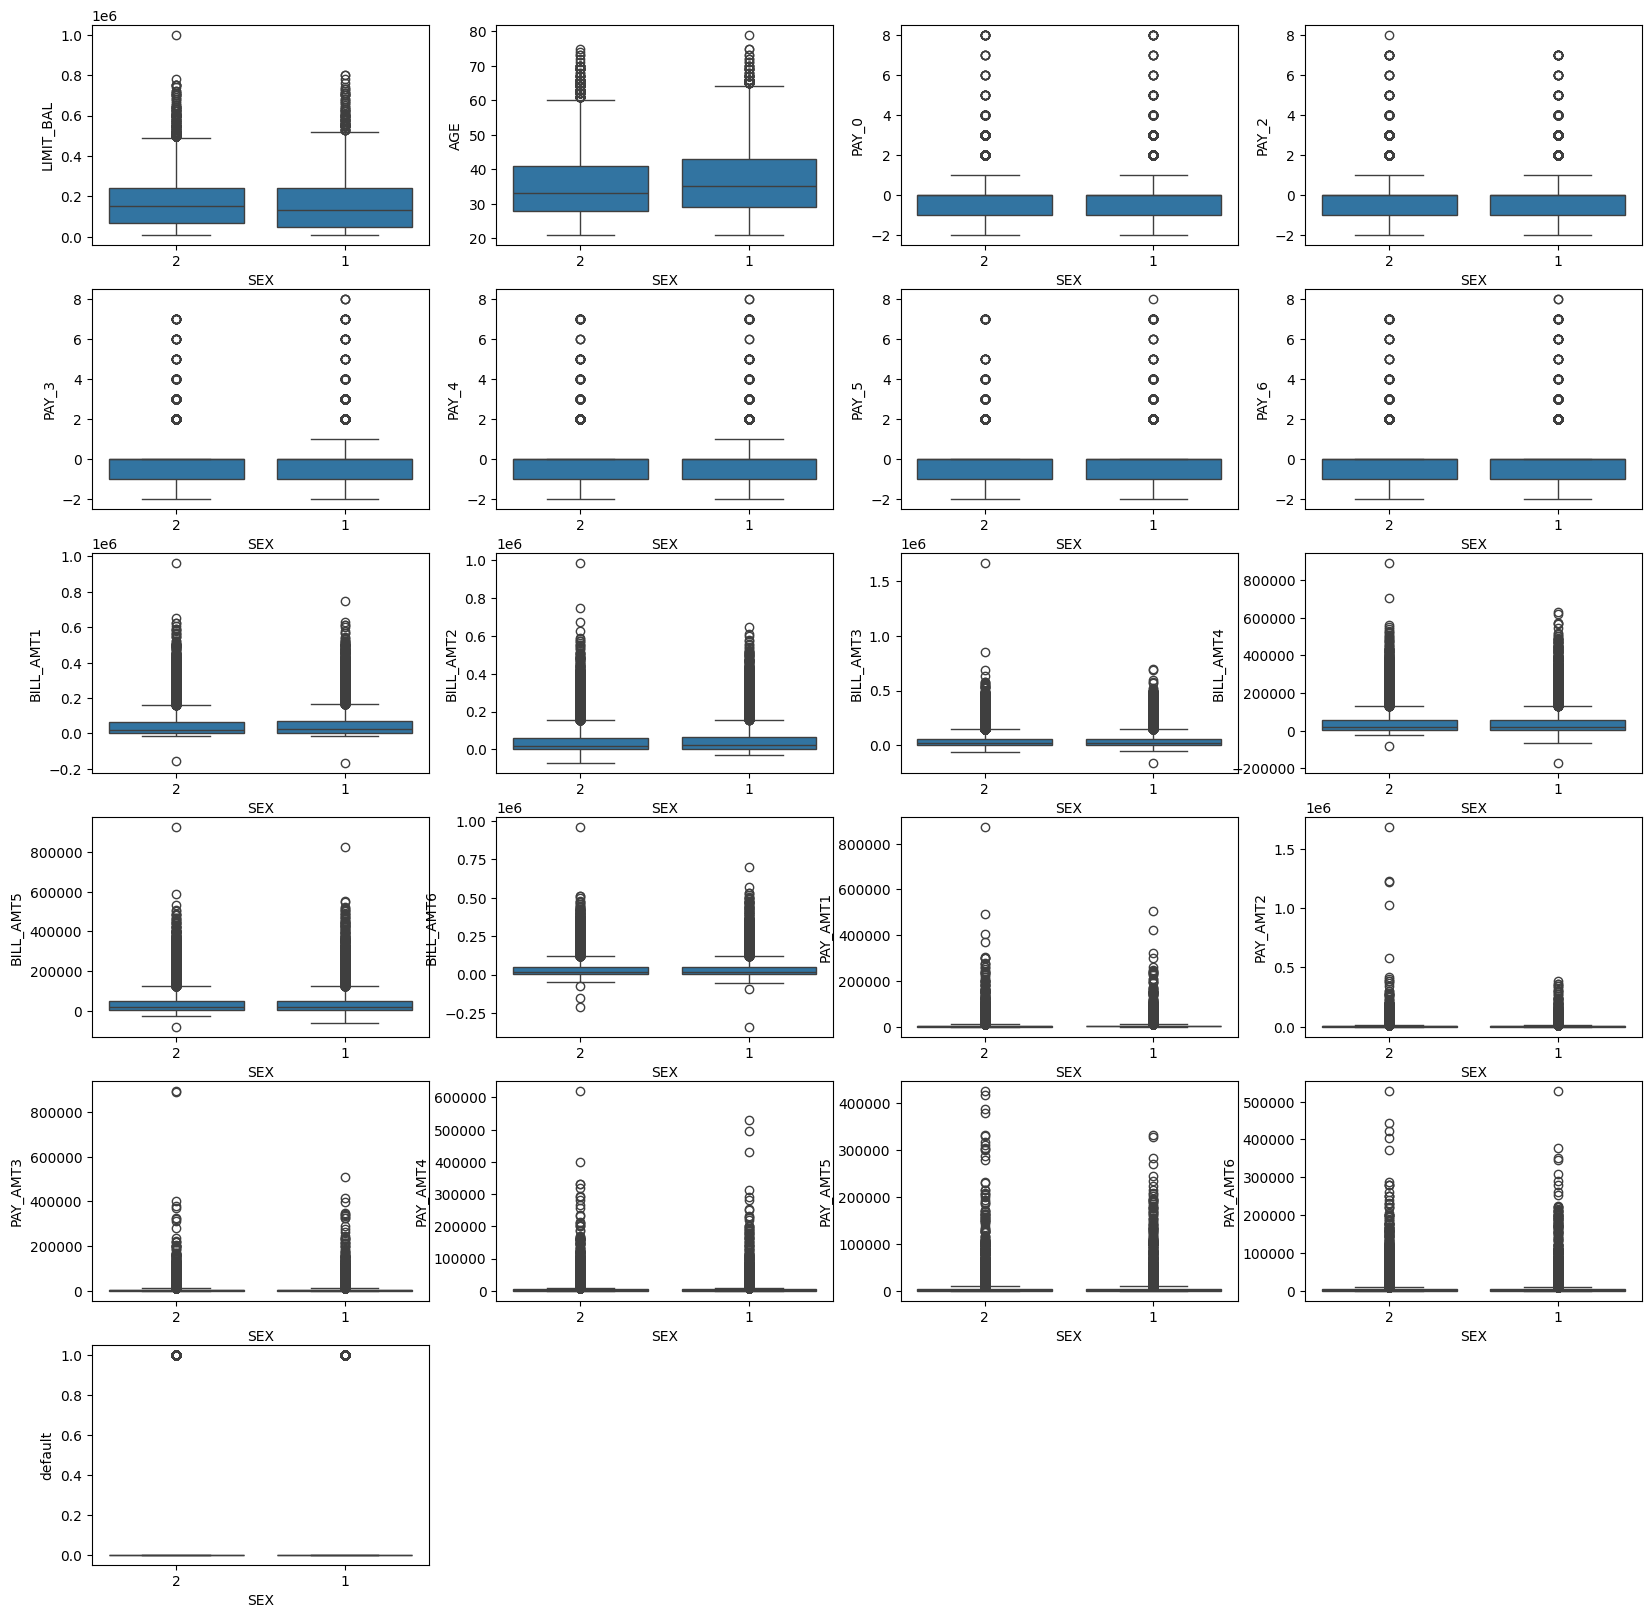

In [83]:
plt.figure(figsize=(20,20))
x=1
for i in con:
    plt.subplot(6,4,x)
    x=x+1
    sb.boxplot(data=df1,x='SEX',y=i)

# Relation of Continuous variables with Education

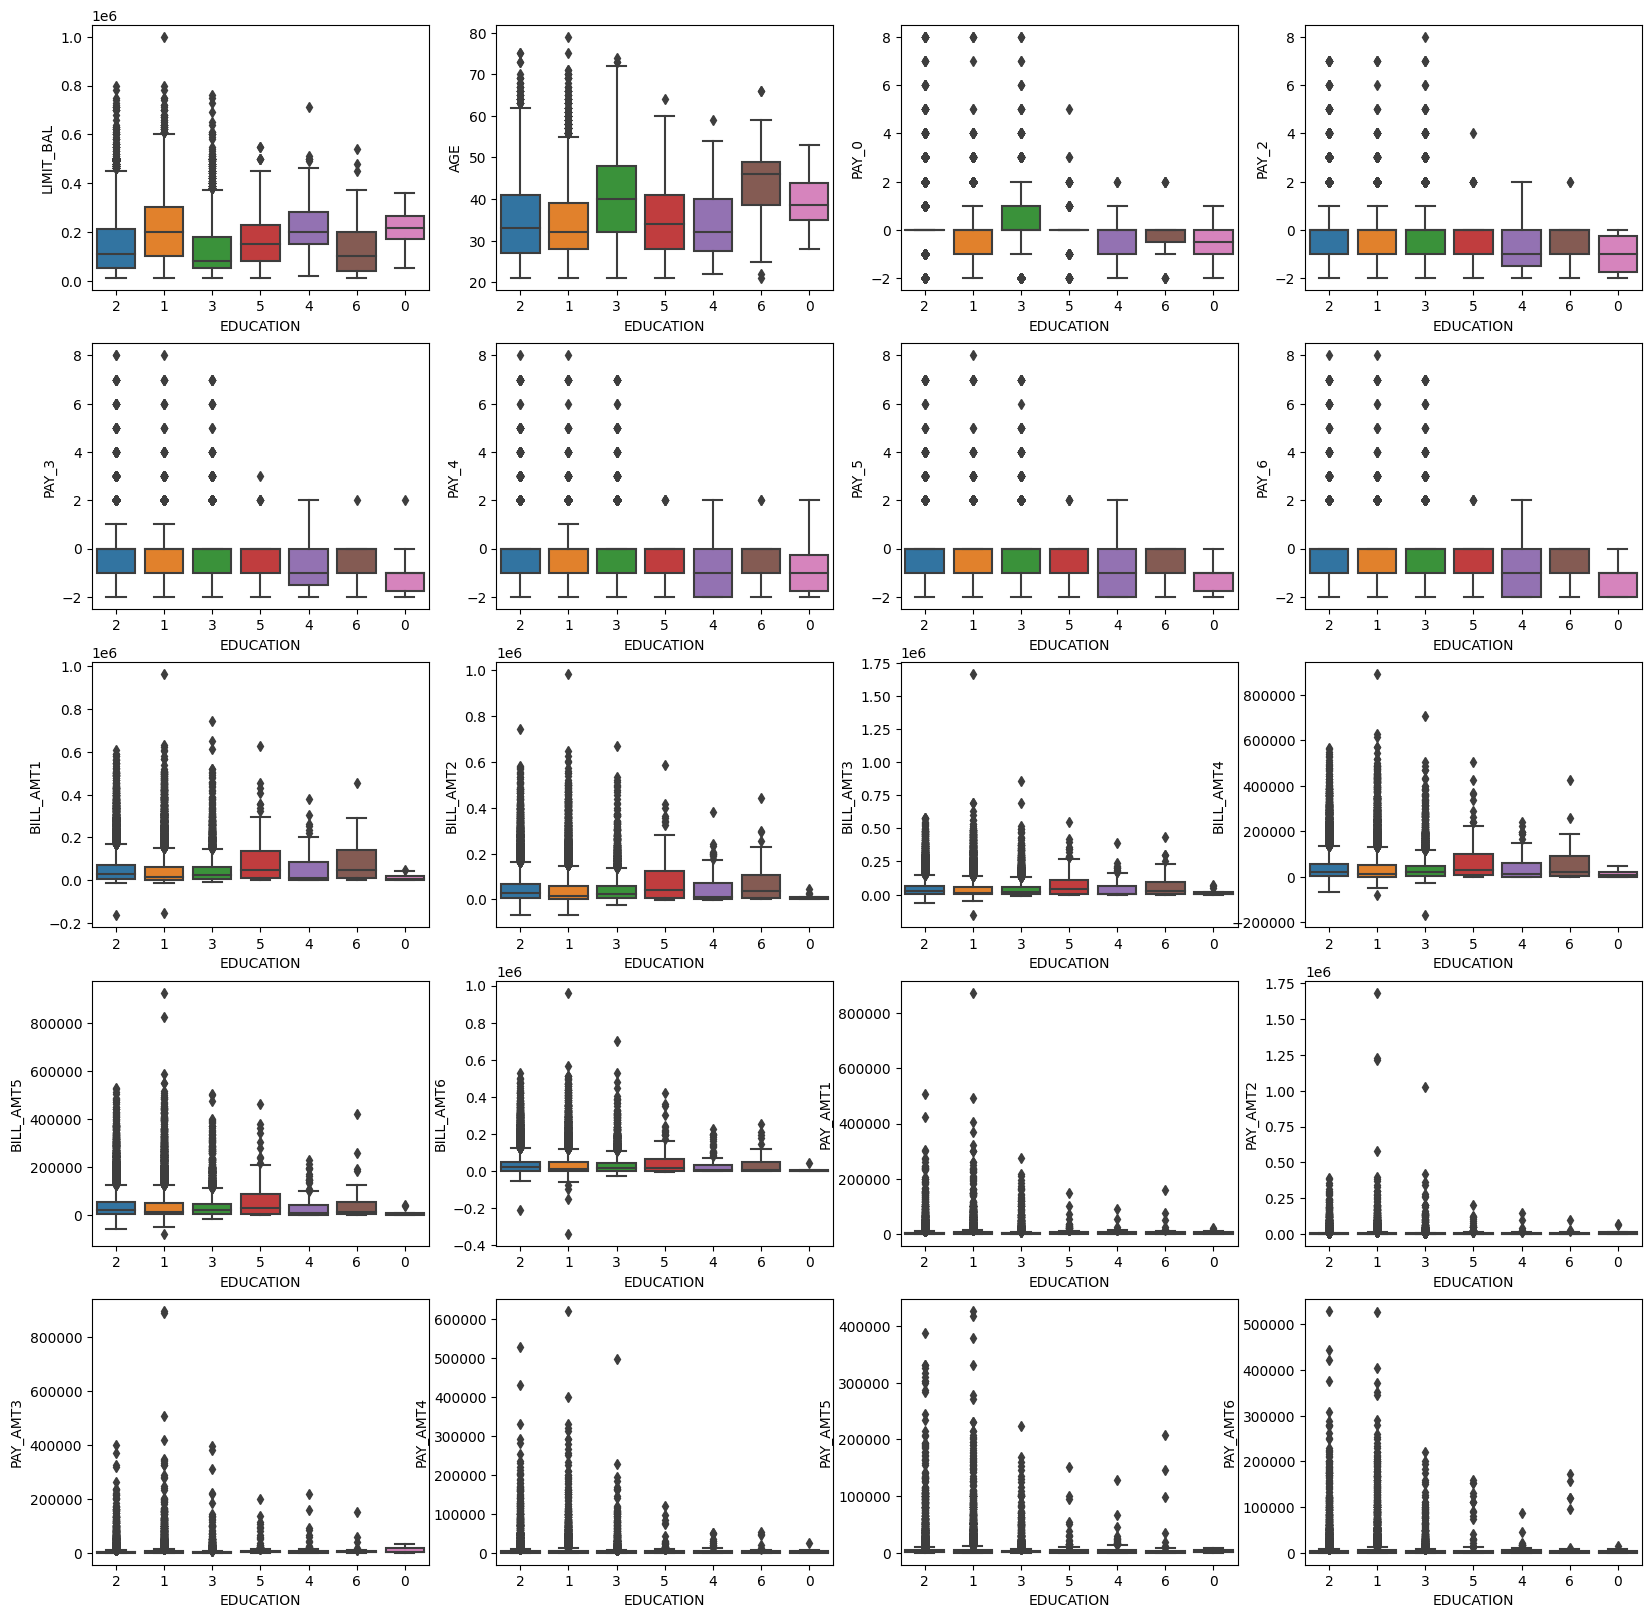

In [60]:
plt.figure(figsize=(20,20))
x=1
for i in con:
    plt.subplot(5,4,x)
    x=x+1
    sb.boxplot(data=df1,x='EDUCATION',y=i)

# Relationship of Continuous variables with Marriage

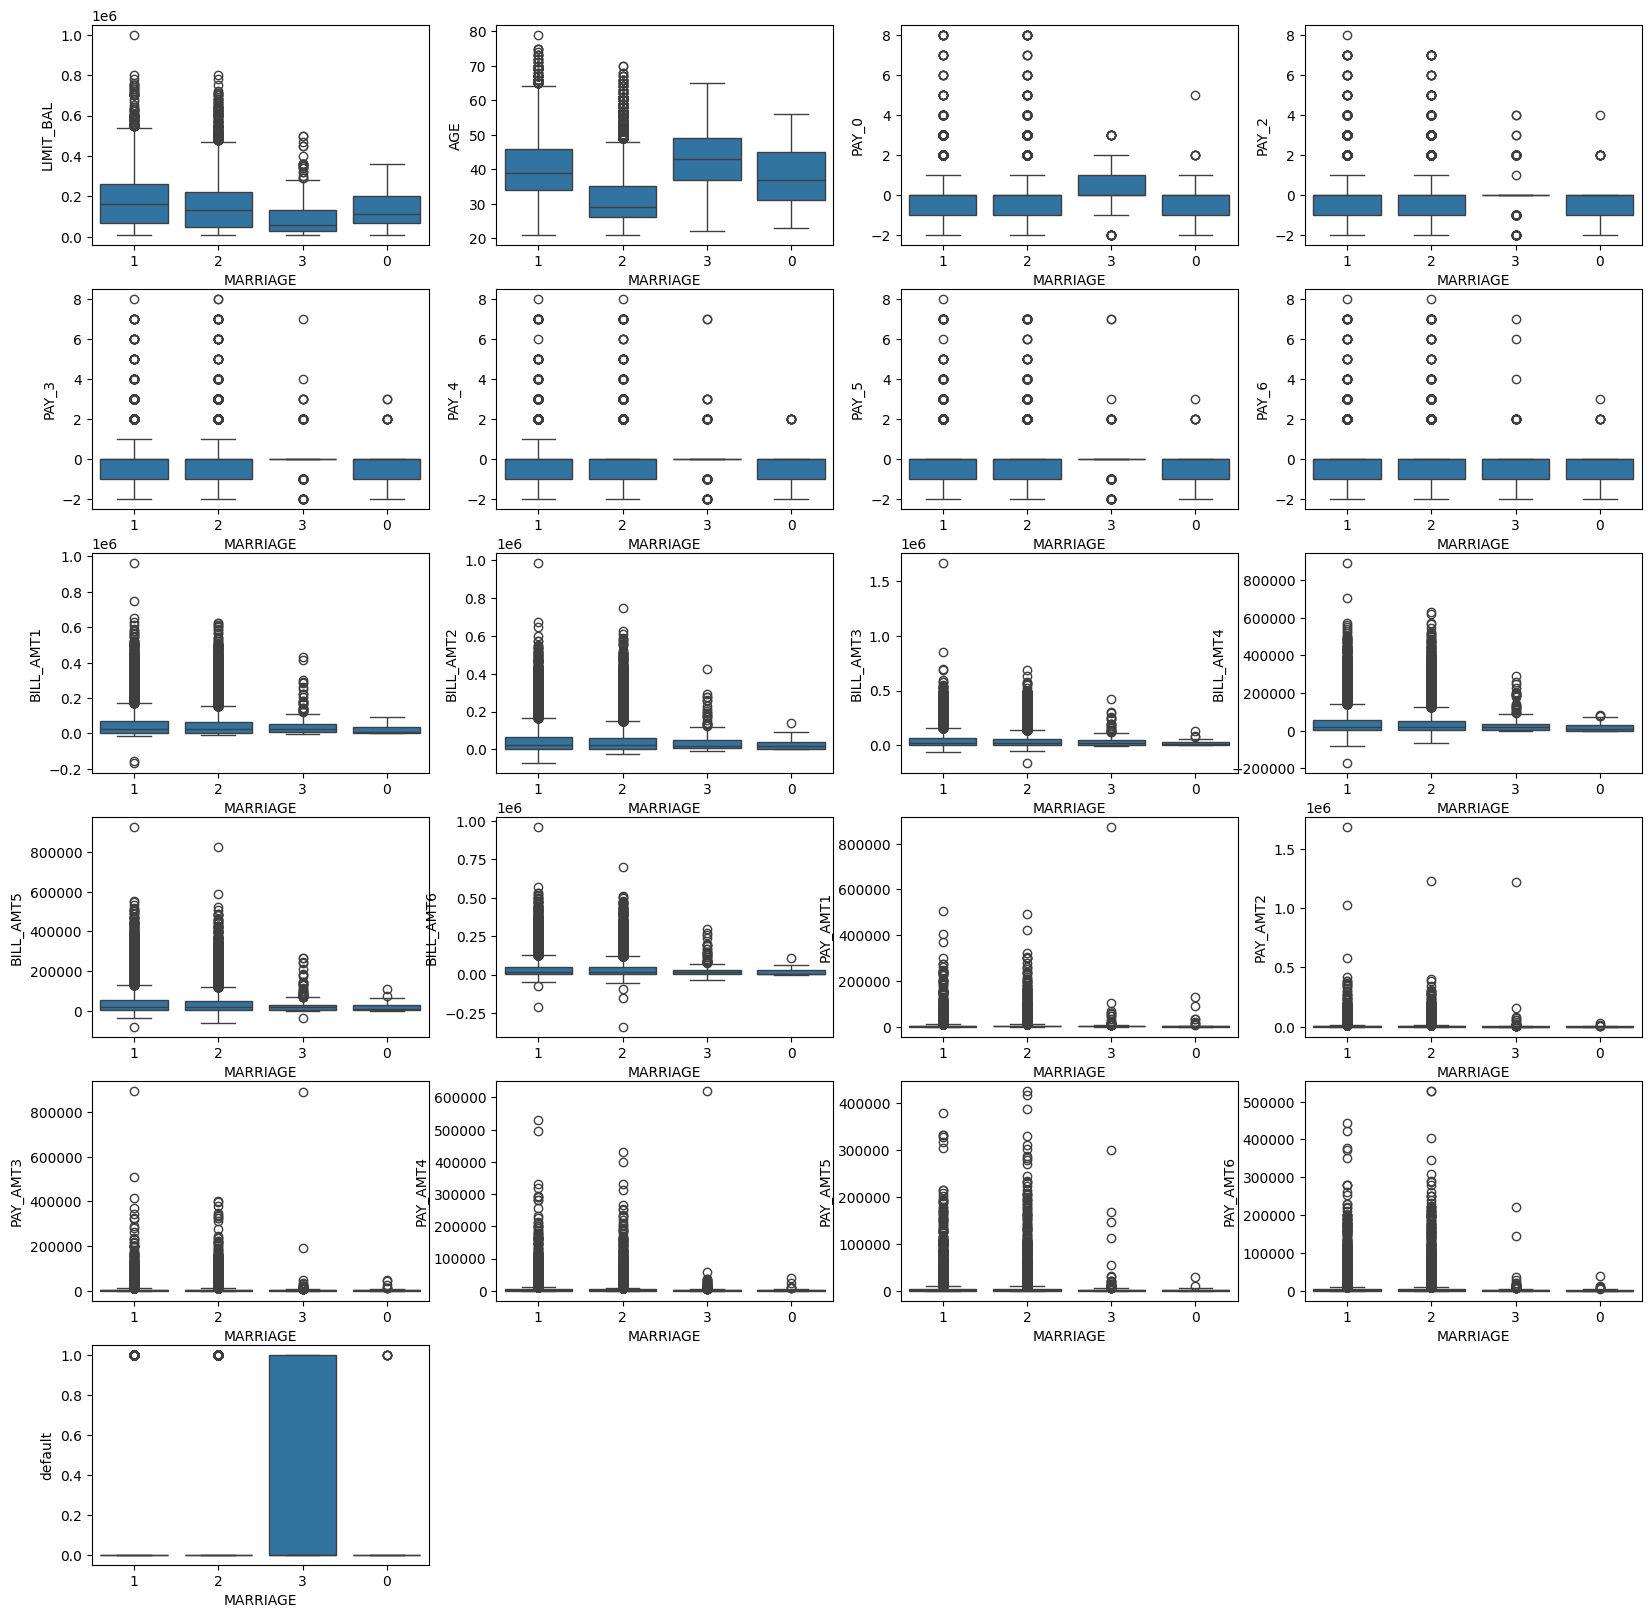

In [84]:
plt.figure(figsize=(20,20))
x=1
for i in con:
    plt.subplot(6,4,x)
    x=x+1
    sb.boxplot(data=df1,x='MARRIAGE',y=i)

# Pushing My Filtered Data to My MONGO DB DataBase

In [85]:
db = client.test

In [86]:
## Create Database and collection name
db_name = client["CCDP_project"]
coll_name = db_name["CreditCard_Fault"]

In [88]:
DBdata = df1.to_dict(orient='records')

In [89]:
DBdata

[{'LIMIT_BAL': 20000.0,
  'SEX': '2',
  'EDUCATION': '2',
  'MARRIAGE': '1',
  'AGE': 24,
  'PAY_0': 2,
  'PAY_2': 2,
  'PAY_3': -1,
  'PAY_4': -1,
  'PAY_5': -2,
  'PAY_6': -2,
  'BILL_AMT1': 3913.0,
  'BILL_AMT2': 3102.0,
  'BILL_AMT3': 689.0,
  'BILL_AMT4': 0.0,
  'BILL_AMT5': 0.0,
  'BILL_AMT6': 0.0,
  'PAY_AMT1': 0.0,
  'PAY_AMT2': 689.0,
  'PAY_AMT3': 0.0,
  'PAY_AMT4': 0.0,
  'PAY_AMT5': 0.0,
  'PAY_AMT6': 0.0,
  'default': 1},
 {'LIMIT_BAL': 120000.0,
  'SEX': '2',
  'EDUCATION': '2',
  'MARRIAGE': '2',
  'AGE': 26,
  'PAY_0': -1,
  'PAY_2': 2,
  'PAY_3': 0,
  'PAY_4': 0,
  'PAY_5': 0,
  'PAY_6': 2,
  'BILL_AMT1': 2682.0,
  'BILL_AMT2': 1725.0,
  'BILL_AMT3': 2682.0,
  'BILL_AMT4': 3272.0,
  'BILL_AMT5': 3455.0,
  'BILL_AMT6': 3261.0,
  'PAY_AMT1': 0.0,
  'PAY_AMT2': 1000.0,
  'PAY_AMT3': 1000.0,
  'PAY_AMT4': 1000.0,
  'PAY_AMT5': 0.0,
  'PAY_AMT6': 2000.0,
  'default': 1},
 {'LIMIT_BAL': 90000.0,
  'SEX': '2',
  'EDUCATION': '2',
  'MARRIAGE': '2',
  'AGE': 34,
  'PAY_0': 0,


In [90]:
coll_name.insert_many(DBdata)

InsertManyResult([ObjectId('660e970853ebccdb559602f7'), ObjectId('660e970853ebccdb559602f8'), ObjectId('660e970853ebccdb559602f9'), ObjectId('660e970853ebccdb559602fa'), ObjectId('660e970853ebccdb559602fb'), ObjectId('660e970853ebccdb559602fc'), ObjectId('660e970853ebccdb559602fd'), ObjectId('660e970853ebccdb559602fe'), ObjectId('660e970853ebccdb559602ff'), ObjectId('660e970853ebccdb55960300'), ObjectId('660e970853ebccdb55960301'), ObjectId('660e970853ebccdb55960302'), ObjectId('660e970853ebccdb55960303'), ObjectId('660e970853ebccdb55960304'), ObjectId('660e970853ebccdb55960305'), ObjectId('660e970853ebccdb55960306'), ObjectId('660e970853ebccdb55960307'), ObjectId('660e970853ebccdb55960308'), ObjectId('660e970853ebccdb55960309'), ObjectId('660e970853ebccdb5596030a'), ObjectId('660e970853ebccdb5596030b'), ObjectId('660e970853ebccdb5596030c'), ObjectId('660e970853ebccdb5596030d'), ObjectId('660e970853ebccdb5596030e'), ObjectId('660e970853ebccdb5596030f'), ObjectId('660e970853ebccdb559603